### Apellidos y Nombres:

Lettere Dragosavljevich Mathias Giuseppe

### Fecha:

26-10-2023

# **Preprocesamiento de datos con Pyspark**


## Google Colab Setup

If you are going to use Google Colab instead of a Spark Cluster, you will need to run the following code to install Apache Spark.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
#If the following links don't work, you will have to update them with the last versions of Apache Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.4.1/spark-3.4.1-bin-hadoop3.tgz
!tar xf spark-3.4.1-bin-hadoop3.tgz

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.1-bin-hadoop3"

## Setup


In [4]:
# Installing required packages
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=a5d937f832055c04554ec869354f2dcce5d1fcb68690ca9f84e59bd267b5c802
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [5]:
import findspark
findspark.init()

In [6]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

#### Creating the spark session and context


In [7]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

#### Initialize Spark session



In [8]:
spark

## Exercise 2 - Load the data and Spark dataframe


## Load the dataset into your Colab directory from your local system


In [9]:
from google.colab import files
files.upload()

Saving wine-clustering.csv to wine-clustering.csv


{'wine-clustering.csv': b'Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline\r\n14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065\r\n13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050\r\n13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185\r\n14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480\r\n13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735\r\n14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450\r\n14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290\r\n14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295\r\n14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045\r\n13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045\r\n14.1,2.16,2.3,18,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510\r\n14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5,1.17,2.82,1280\r\n13.75,1.73,2.41,16,89,2.6,2.76,0.29,1.81,5.6,1

In [11]:
dfsWine = spark.read.csv("wine-clustering.csv", header=True, inferSchema=True, nullValue= 'NA')
print(dfsWine.printSchema())

root
 |-- Alcohol: double (nullable = true)
 |-- Malic_Acid: double (nullable = true)
 |-- Ash: double (nullable = true)
 |-- Ash_Alcanity: double (nullable = true)
 |-- Magnesium: integer (nullable = true)
 |-- Total_Phenols: double (nullable = true)
 |-- Flavanoids: double (nullable = true)
 |-- Nonflavanoid_Phenols: double (nullable = true)
 |-- Proanthocyanins: double (nullable = true)
 |-- Color_Intensity: double (nullable = true)
 |-- Hue: double (nullable = true)
 |-- OD280: double (nullable = true)
 |-- Proline: integer (nullable = true)

None


In [34]:
dfsWine.count()

178

## Limpieza

In [12]:
from pyspark.sql.functions import col, isnan, when, count, isnull, max, min, mode, lit

In [13]:
res = [count(when((col(c) == ' ')|( col(c).isNull()), c)).alias(c) for c in dfsWine.columns]
dfsWine.select(*res).show()
#def check_for_null_or_nan(df):
    #null_or_nan = lambda x: isnan(x) , isnull(x)
    #func = lambda x: df.filter(null_or_nan(x)).count()
   # print(*[f'{i} has {func(i)} nans/nulls' for i in df.columns if func(i)!=0],sep='\n')

+-------+----------+---+------------+---------+-------------+----------+--------------------+---------------+---------------+---+-----+-------+
|Alcohol|Malic_Acid|Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity|Hue|OD280|Proline|
+-------+----------+---+------------+---------+-------------+----------+--------------------+---------------+---------------+---+-----+-------+
|      0|         0|  0|           0|        0|            0|         0|                   0|              0|              0|  0|    0|      0|
+-------+----------+---+------------+---------+-------------+----------+--------------------+---------------+---------------+---+-----+-------+



In [14]:
dfsWine.show()

+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|Alcohol|Malic_Acid| Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280|Proline|
+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+
|  14.23|      1.71|2.43|        15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04| 3.92|   1065|
|   13.2|      1.78|2.14|        11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|  3.4|   1050|
|  13.16|      2.36|2.67|        18.6|      101|          2.8|      3.24|                 0.3|           2.81|           5.68|1.03| 3.17|   1185|
|  14.37|      1.95| 2.5|        16.8|      113|         3.85|      3.49|                0.24|           2.18|            7.

No es necesario hacer mucha limpieza, no hay nulos y no hay atípicos que se observen inmediatamente los cuales haya que tratar

## Análisis de Correlación

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
dfp = pd.read_csv("wine-clustering.csv")

In [19]:
# Compute the correlation matrix
correlation_matrix = df.corr()

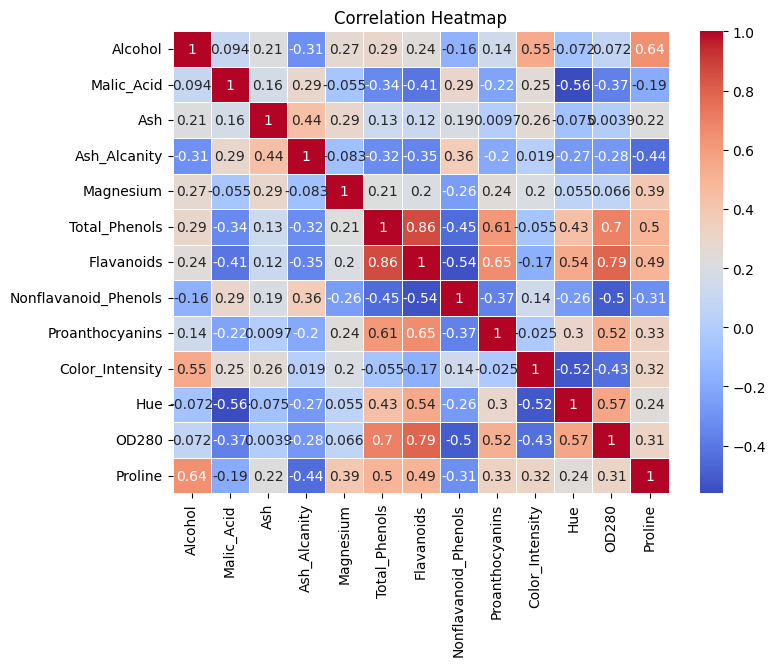

In [20]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Se decidió eliminar la variable Flavanoids, dado que tiene una alta correlación con OD280, Total_Phenols y Proanthocyanins.

## Consolidar columnas (features)

In [21]:
from pyspark.ml.feature import VectorAssembler

In [22]:
featuresUsed = ['Alcohol','Malic_Acid', 'Ash','Ash_Alcanity','Magnesium','Total_Phenols',
                'Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity', 'Hue','OD280','Proline']
assembler = VectorAssembler(inputCols= featuresUsed,
                            outputCol='features_unscaled')
dfsWineAssembled = assembler.transform(dfsWine)

dfsWineAssembled.show()

+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+--------------------+
|Alcohol|Malic_Acid| Ash|Ash_Alcanity|Magnesium|Total_Phenols|Flavanoids|Nonflavanoid_Phenols|Proanthocyanins|Color_Intensity| Hue|OD280|Proline|   features_unscaled|
+-------+----------+----+------------+---------+-------------+----------+--------------------+---------------+---------------+----+-----+-------+--------------------+
|  14.23|      1.71|2.43|        15.6|      127|          2.8|      3.06|                0.28|           2.29|           5.64|1.04| 3.92|   1065|[14.23,1.71,2.43,...|
|   13.2|      1.78|2.14|        11.2|      100|         2.65|      2.76|                0.26|           1.28|           4.38|1.05|  3.4|   1050|[13.2,1.78,2.14,1...|
|  13.16|      2.36|2.67|        18.6|      101|          2.8|      3.24|                 0.3|           2.81|           5.68|1.03| 3.17|   1185|[13.16,2.36,2.67,...

## Normalizacion de Datos

In [23]:
from pyspark.ml.feature import StandardScaler

In [24]:
scaler = StandardScaler(inputCol='features_unscaled', outputCol='features', withStd=True, withMean=True)
scalerModel = scaler.fit(dfsWineAssembled)
dfs_scaled = scalerModel.transform(dfsWineAssembled)
dfs_scaled.select('features').show()

+--------------------+
|            features|
+--------------------+
|[1.51434076729214...|
|[0.24559682781702...|
|[0.19632521851701...|
|[1.68679139984215...|
|[0.29486843711702...|
|[1.47738706031713...|
|[1.71142720449216...|
|[1.30493642776712...|
|[2.25341490679221...|
|[1.05857838126709...|
|[1.35420803706712...|
|[1.37884384171712...|
|[0.92308145569208...|
|[2.15487168819220...|
|[1.69910930216716...|
|[0.77526662779207...|
|[1.60056608356715...|
|[1.02162467429209...|
|[1.46506915799213...|
|[0.78758453011707...|
+--------------------+
only showing top 20 rows



## Creacion del Grafico de Codo

In [25]:
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())

    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


In [27]:
def elbow(elbowset, clusters):
	wsseList = []
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

In [28]:
def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

In [29]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [30]:
def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

### Grafico de Codo

In [72]:
elbowset = dfs_scaled
elbowset.persist()

DataFrame[Alcohol: double, Malic_Acid: double, Ash: double, Ash_Alcanity: double, Magnesium: int, Total_Phenols: double, Flavanoids: double, Nonflavanoid_Phenols: double, Proanthocyanins: double, Color_Intensity: double, Hue: double, OD280: double, Proline: int, features_unscaled: vector, features: vector]

In [73]:
clusters = range (2, 30)
wsseList = elbow(elbowset, clusters)

Training for cluster size 2 
......................WSSE = 510.23423655494 
Training for cluster size 3 
......................WSSE = 441.5238283592757 
Training for cluster size 4 
......................WSSE = 429.3633540896674 
Training for cluster size 5 
......................WSSE = 414.5871429594711 
Training for cluster size 6 
......................WSSE = 410.1738844591024 
Training for cluster size 7 
......................WSSE = 401.57216315985414 
Training for cluster size 8 
......................WSSE = 381.3468661800828 
Training for cluster size 9 
......................WSSE = 379.1999315876998 
Training for cluster size 10 
......................WSSE = 375.0932837421113 
Training for cluster size 11 
......................WSSE = 368.5622066515367 
Training for cluster size 12 
......................WSSE = 356.4332950242783 
Training for cluster size 13 
......................WSSE = 357.73609798198316 
Training for cluster size 14 
......................WSSE = 350.954849969

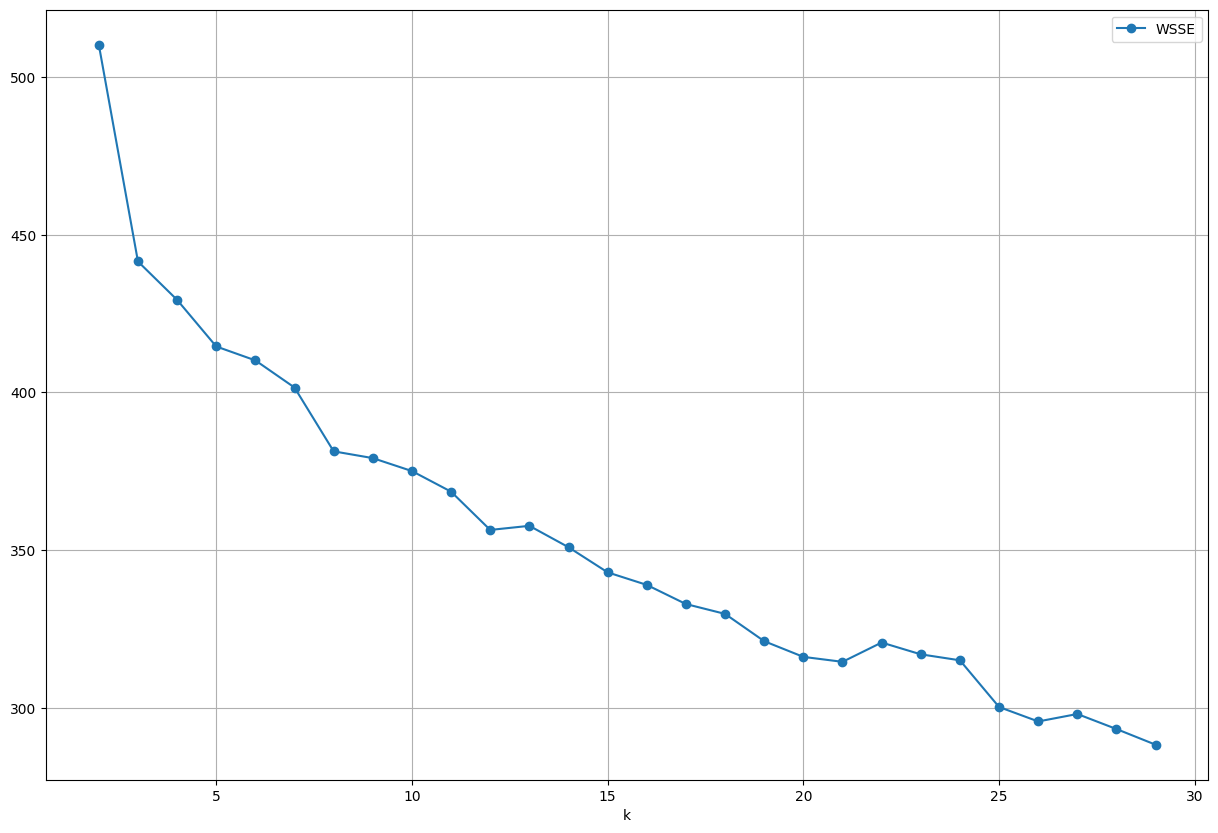

In [74]:
elbow_plot(wsseList, clusters)

## Clustering con el valor de K = 12


In [78]:
scaledDataFeat = dfs_scaled.select("features")
scaledDataFeat.persist()

DataFrame[features: vector]

In [79]:
kmeans = KM(k= 12, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

### Centroides para el clustering

In [80]:
centers = model.clusterCenters()
centers

[array([-0.39821887,  0.12202375, -0.45144119, -0.06436284,  0.01809398,
        -1.24168899,  0.31186575, -1.09063081, -0.00837827, -0.9262574 ,
        -1.25778981, -0.40464772]),
 array([ 1.23194145, -0.38230367,  0.03834668, -1.06981685,  0.53413661,
         1.19138313, -0.79757875,  1.05384093,  0.55535242,  0.37412145,
         0.84531627,  1.3685245 ]),
 array([-1.05681604,  0.39414572, -0.38826018,  0.18117821, -0.57937447,
         0.53402639, -0.32023192,  0.89180843, -1.03873725, -0.22800782,
         0.72439654, -0.95867289]),
 array([-1.06593561, -0.3778716 ,  0.11629268,  1.04482709, -0.92159222,
        -0.52451818,  0.76324326, -0.1293887 , -1.03941833,  0.47398737,
         0.16664254, -0.86491101]),
 array([-0.73983536, -0.71060385,  0.56856771, -0.44764644,  0.33316523,
        -0.38365736,  1.57204352, -1.50849219, -0.75943606,  1.22522047,
        -0.74534159, -0.47281589]),
 array([-0.81784874, -0.9873507 , -1.45747738, -0.78701212,  3.49554709,
        -0.338385

## A Pandas DF

In [81]:
df = pd_centers(featuresUsed, centers)

In [82]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,prediction
0,-0.398219,0.122024,-0.451441,-0.064363,0.018094,-1.241689,0.311866,-1.090631,-0.008378,-0.926257,-1.257790,-0.404648,0
1,1.231941,-0.382304,0.038347,-1.069817,0.534137,1.191383,-0.797579,1.053841,0.555352,0.374121,0.845316,1.368524,1
2,-1.056816,0.394146,-0.388260,0.181178,-0.579374,0.534026,-0.320232,0.891808,-1.038737,-0.228008,0.724397,-0.958673,2
3,-1.065936,-0.377872,0.116293,1.044827,-0.921592,-0.524518,0.763243,-0.129389,-1.039418,0.473987,0.166643,-0.864911,3
4,-0.739835,-0.710604,0.568568,-0.447646,0.333165,-0.383657,1.572044,-1.508492,-0.759436,1.225220,-0.745342,-0.472816,4
5,-0.817849,-0.987351,-1.457477,-0.787012,3.495547,-0.338386,-0.738059,2.194022,-0.909331,0.915325,0.082134,0.173935,5
6,-0.757340,-0.841459,-1.516310,-0.505958,-0.822096,0.045653,-0.636563,-0.251690,-0.720898,0.784842,0.366052,-0.760453,6
7,0.300467,0.865856,-0.146361,0.164845,0.011729,-1.131003,0.642524,-0.611487,1.916032,-1.524068,-1.367309,-0.260055,7
8,0.561243,0.361324,1.097101,1.330280,0.595725,-0.529459,-0.034984,0.096707,2.082642,-1.410715,-1.368589,-0.482343,8
9,0.224203,1.574943,0.423245,0.789515,-0.416741,-0.912201,1.372222,-0.983656,0.440350,-0.921407,-1.163991,-0.437216,9


In [86]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium               float64
Total_Phenols           float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                 float64
prediction                int64
dtype: object

## Grafico en paralelo

### Todos los Cluster

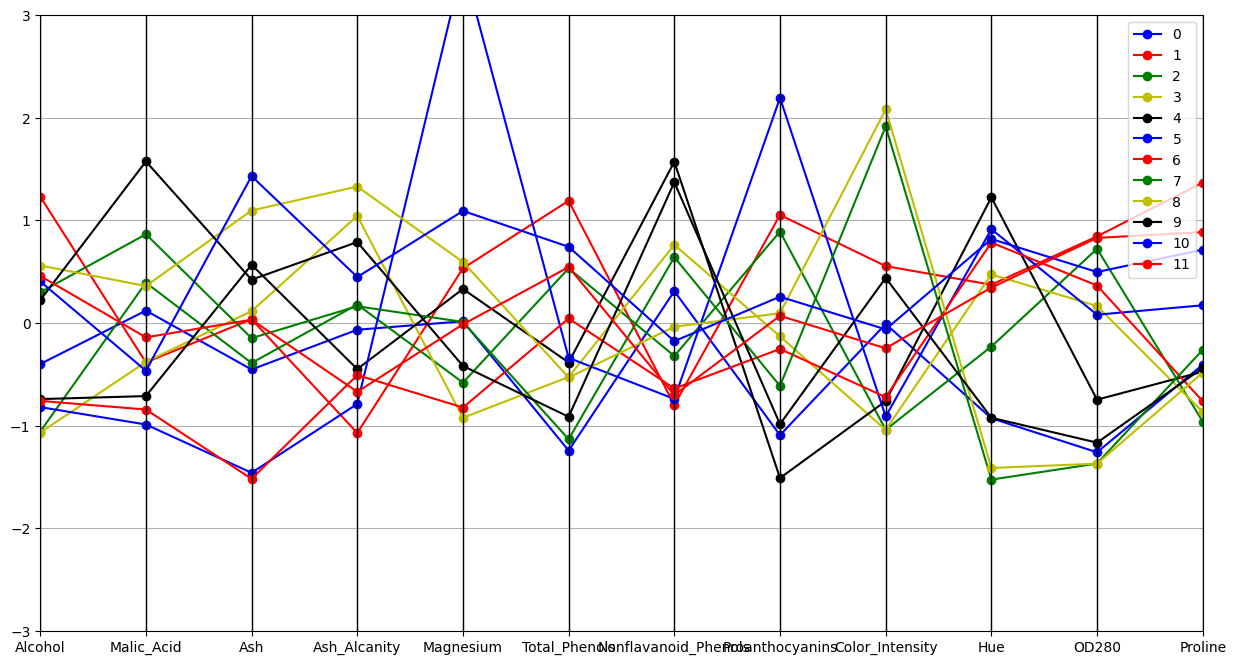

In [83]:
parallel_plot(df, df)

## Scatter Plots

In [89]:
predictions = model.transform(scaledDataFeat)

In [94]:
predictions.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[1.51434076729214...|         1|
|[0.24559682781702...|        11|
|[0.19632521851701...|         1|
|[1.68679139984215...|         1|
|[0.29486843711702...|        10|
|[1.47738706031713...|         1|
|[1.71142720449216...|         1|
|[1.30493642776712...|        10|
|[2.25341490679221...|         1|
|[1.05857838126709...|         1|
|[1.35420803706712...|         1|
|[1.37884384171712...|        11|
|[0.92308145569208...|        11|
|[2.15487168819220...|         1|
|[1.69910930216716...|         1|
|[0.77526662779207...|        10|
|[1.60056608356715...|        10|
|[1.02162467429209...|        10|
|[1.46506915799213...|         1|
|[0.78758453011707...|        11|
+--------------------+----------+
only showing top 20 rows



In [ ]:
# De prueba
data = [row[0] for row in predictions.select('prediction').collect()]

plt.scatter(dfp['Alcohol'], dfp['Malic_Acid'], c=data, label= 'prediction')
plt.title('Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-126-99ab416167fb>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


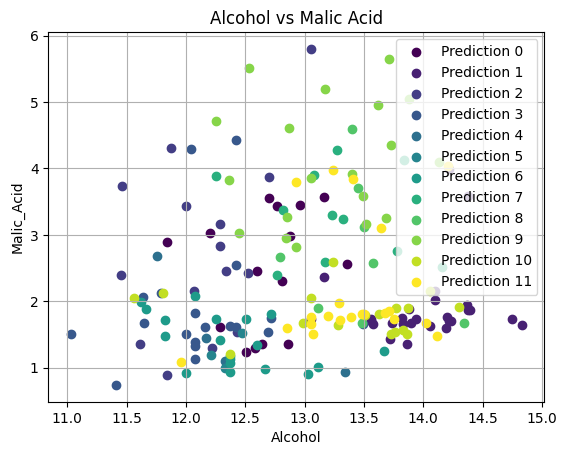

In [126]:
data = [row[0] for row in predictions.select('prediction').collect()]

unique_labels = list(set(data))
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for i, label in enumerate(unique_labels):
    x = [dfp['Alcohol'][j] for j in range(len(data)) if data[j] == label]
    y = [dfp['Malic_Acid'][j] for j in range(len(data)) if data[j] == label]
    plt.scatter(x, y, color=colors(i), label=f'Prediction {label}')

plt.title('Alcohol vs Malic Acid')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.grid(True)
plt.show()

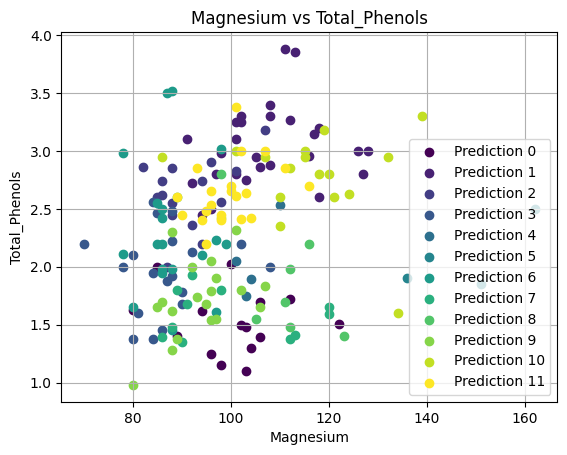

In [128]:
for i, label in enumerate(unique_labels):
    x = [dfp['Magnesium'][j] for j in range(len(data)) if data[j] == label]
    y = [dfp['Total_Phenols'][j] for j in range(len(data)) if data[j] == label]
    plt.scatter(x, y, color=colors(i), label=f'Prediction {label}')

plt.title('Magnesium vs Total_Phenols')
plt.xlabel('Magnesium')
plt.ylabel('Total_Phenols')
plt.legend()
plt.grid(True)
plt.show()

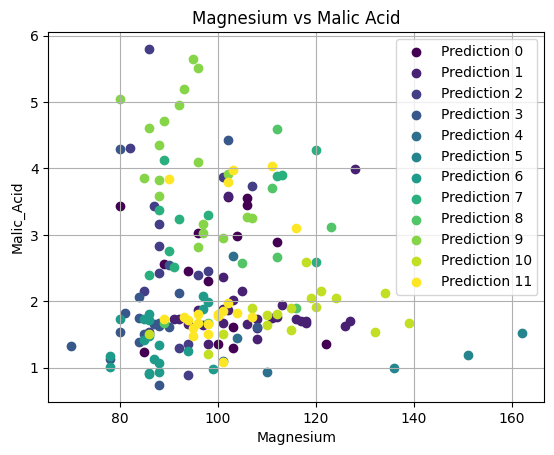

In [129]:
for i, label in enumerate(unique_labels):
    x = [dfp['Magnesium'][j] for j in range(len(data)) if data[j] == label]
    y = [dfp['Malic_Acid'][j] for j in range(len(data)) if data[j] == label]
    plt.scatter(x, y, color=colors(i), label=f'Prediction {label}')

plt.title('Magnesium vs Malic Acid')
plt.xlabel('Magnesium')
plt.ylabel('Malic_Acid')
plt.legend()
plt.grid(True)
plt.show()

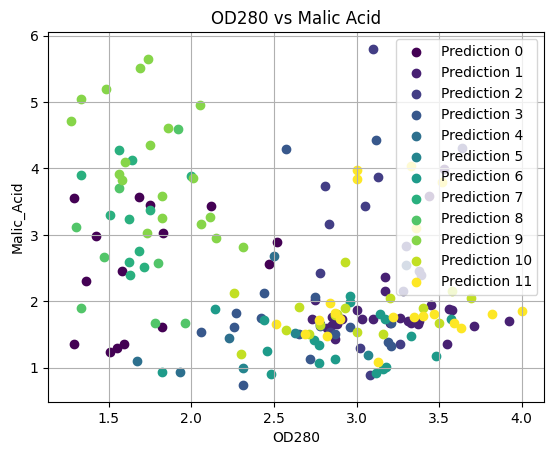

In [130]:

for i, label in enumerate(unique_labels):
    x = [dfp['OD280'][j] for j in range(len(data)) if data[j] == label]
    y = [dfp['Malic_Acid'][j] for j in range(len(data)) if data[j] == label]
    plt.scatter(x, y, color=colors(i), label=f'Prediction {label}')

plt.title('OD280 vs Malic Acid')
plt.xlabel('OD280')
plt.ylabel('Malic_Acid')
plt.legend()
plt.grid(True)
plt.show()

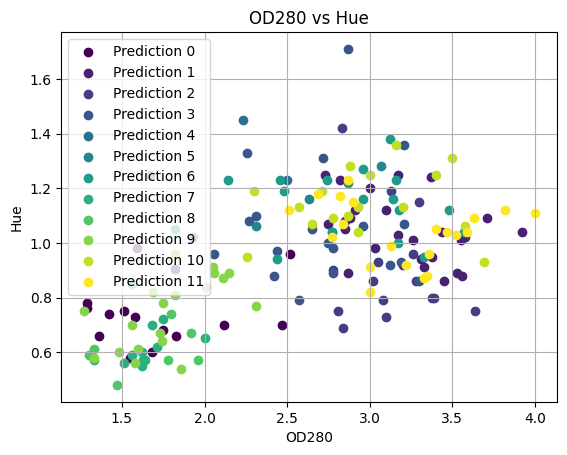

In [131]:
for i, label in enumerate(unique_labels):
    x = [dfp['OD280'][j] for j in range(len(data)) if data[j] == label]
    y = [dfp['Hue'][j] for j in range(len(data)) if data[j] == label]
    plt.scatter(x, y, color=colors(i), label=f'Prediction {label}')

plt.title('OD280 vs Hue')
plt.xlabel('OD280')
plt.ylabel('Hue')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
spark.stop()